# McDonalds Restaurant Reviews

## Goals
* Overall sentiment summary
* Top complaints and praises
* trending issues
* customer suggestions
* location specific insights

# Data cleaning and Visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import re

# Load the CSV with the detected encoding
df = pd.read_csv('McDonald_s_Reviews.csv', encoding = "ISO-8859-1")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [3]:
#check for missing values
print(df.isnull().sum())

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64


In [4]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
#noticing there are some reviews and an address that contain weird encoding... identify those
problematic_rows = df[df["review"].str.contains("¿", na=False)]
len(problematic_rows)

2964

In [6]:
print(problematic_rows["review"].iloc[7])

McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s is proud to own the most broken ice cream machines on the planet. When I asked at the drive through if they had ice cream the lady replied ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½naï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï


In [7]:
#remove the jumbled address
# Function to detect non-ASCII characters
def contains_garbled_text(text):
    return bool(re.search(r'[^\x00-\x7F]+', text))

df = df[~df["store_address"].apply(contains_garbled_text)]

In [8]:
review_counts = df["store_address"].value_counts()
print(review_counts)

store_address
9814 International Dr, Orlando, FL 32819, United States                       1890
5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States          1720
10901 Riverside Dr, North Hollywood, CA 91602, United States                  1710
1415 E State Rd, Fern Park, FL 32730, United States                           1700
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States        1650
3501 Biscayne Blvd, Miami, FL 33137, United States                            1570
621 Broadway, Newark, NJ 07104, United States                                 1290
1100 N US Hwy 377, Roanoke, TX 76262, United States                           1168
72-69 Kissena Blvd, Queens, NY 11367, United States                           1140
429 7th Ave, New York, NY 10001, United States                                1140
724 Broadway, New York, NY 10003, United States                               1140
By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United State

In [9]:
#replace the jumbled characters in the actual reviews with empty str
def clean_review(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)  # Replace non-ASCII characters with empty str

df["cleaned_review"] = df["review"].apply(clean_review)

In [10]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,cleaned_review
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Why does it look like someone spit on my food?...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,It'd McDonalds. It is what it is as far as the...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,Made a mobile order got to the speaker and che...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,My mc. Crispy chicken sandwich was customer s...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,"I repeat my order 3 times in the drive thru, a..."


In [11]:
problematic_rows = df[df["review"].str.contains("¿", na=False)]
print(problematic_rows["review"].iloc[1])
print(df["cleaned_review"].iloc[3])

My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p
My mc. Crispy chicken sandwich was  customer service was quick and p


In [12]:
df["review_length"] = df["cleaned_review"].str.len()
print(df["review_length"].describe())

count    32736.000000
mean       118.076369
std        174.811105
min          0.000000
25%         15.000000
50%         58.000000
75%        150.000000
max       3115.000000
Name: review_length, dtype: float64


In [13]:
short_reviews = df[df["review_length"] < 2]
short_reviews[["cleaned_review", "review_length"]].head(20)

,cleaned_review,review_length
604,,1
2542,,1
2568,,1
2764,,1
2902,,1
3566,,1
3686,,1
3782,,1
4802,,1
4898,,1


In [14]:
#seems like reviews less than 2 characters long are useless. I will remove these.
df = df[df["review_length"] >= 2]
df.reset_index(drop=True, inplace=True)  # Reset index after dropping rows
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,cleaned_review,review_length
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Why does it look like someone spit on my food?...,259
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,It'd McDonalds. It is what it is as far as the...,237
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,Made a mobile order got to the speaker and che...,332
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,My mc. Crispy chicken sandwich was customer s...,68
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,"I repeat my order 3 times in the drive thru, a...",312


In [15]:
#removing irrelevant columns
df = df.drop(df.columns[[0, 1, 2, 4, 5, 6, 8]], axis=1)
df.reset_index(drop=True, inplace=True)
df.head()

,store_address,review_time,rating,cleaned_review,review_length
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1 star,Why does it look like someone spit on my food?...,259
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4 stars,It'd McDonalds. It is what it is as far as the...,237
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1 star,Made a mobile order got to the speaker and che...,332
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5 stars,My mc. Crispy chicken sandwich was customer s...,68
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1 star,"I repeat my order 3 times in the drive thru, a...",312


In [16]:
df["review_length"].describe()

count    32684.000000
mean       118.262973
std        174.887451
min          2.000000
25%         15.000000
50%         58.000000
75%        150.000000
max       3115.000000
Name: review_length, dtype: float64

In [17]:
# Remove blank review
df = df[df["cleaned_review"].str.strip() != ""]
df.reset_index(drop=True, inplace=True)

In [18]:
#remove any excess whitespace
df["cleaned_review"] = df["cleaned_review"].str.replace(r'\s+', ' ', regex=True)

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["sentiment_scores"] = df["cleaned_review"].apply(lambda x: analyzer.polarity_scores(x))

# Extract individual sentiment components (if needed)
df["positive_score"] = df["sentiment_scores"].apply(lambda x: x['pos'])
df["neutral_score"] = df["sentiment_scores"].apply(lambda x: x['neu'])
df["negative_score"] = df["sentiment_scores"].apply(lambda x: x['neg'])
df["compound_score"] = df["sentiment_scores"].apply(lambda x: x['compound'])

In [20]:
# Categorize sentiment
df["vader_sentiment"] = df["compound_score"].apply(lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral"))

# Count each category
sentiment_counts = df["vader_sentiment"].value_counts()
print(sentiment_counts)


vader_sentiment
positive    17126
negative     9416
neutral      6141
Name: count, dtype: int64


In [21]:
df.head()

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1 star,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4 stars,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1 star,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5 stars,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1 star,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative


In [22]:
df["cleaned_review"].iloc[0]

'Why does it look like someone spit on my food? I had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.'

In [23]:
df["rating"] = df["rating"].str.extract("(\d)").astype(int)

In [24]:
def refine_sentiment(row):
    if row["rating"] <= 2:
        return "negative"
    elif row["rating"] >= 4 and row["compound_score"] > 0.05:
        return "positive"
    elif row["rating"] == 3:
        return "neutral"
    else:
        return "mixed"

df["refined_sentiment"] = df.apply(refine_sentiment, axis=1)

In [25]:
df.head(10)

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment,refined_sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive,negative
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive,positive
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative,negative
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,mixed
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative,negative
5,"13749 US-183 Hwy, Austin, TX 78750, United States",3 weeks ago,1,I work for door dash and they locked us all ou...,191,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",0.000,0.905,0.095,-0.5267,negative,negative
6,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,If I could give this location a zero on custom...,879,"{'neg': 0.065, 'neu': 0.92, 'pos': 0.015, 'com...",0.015,0.920,0.065,-0.7748,negative,negative
7,"13749 US-183 Hwy, Austin, TX 78750, United States",a year ago,1,Came in and ordered a Large coffee w/no ice. T...,292,"{'neg': 0.021, 'neu': 0.934, 'pos': 0.045, 'co...",0.045,0.934,0.021,0.3818,positive,negative
8,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Went thru drive thru. Ordered. Getting home no...,195,"{'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'comp...",0.000,0.818,0.182,-0.6901,negative,negative
9,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,4,"I'm not really a huge fan of fast food, but I ...",557,"{'neg': 0.011, 'neu': 0.645, 'pos': 0.344, 'co...",0.344,0.645,0.011,0.9946,positive,positive


In [26]:
df["cleaned_review"].iloc[7]

'Came in and ordered a Large coffee w/no ice. They handed me a cup that was less than half way full. I asked the employee, Flor, if they could give me a Large coffee w/no ice and she said no. I was willing to pay more to get a full cup of coffee. I always get a large sweet tea w/no ice and it'

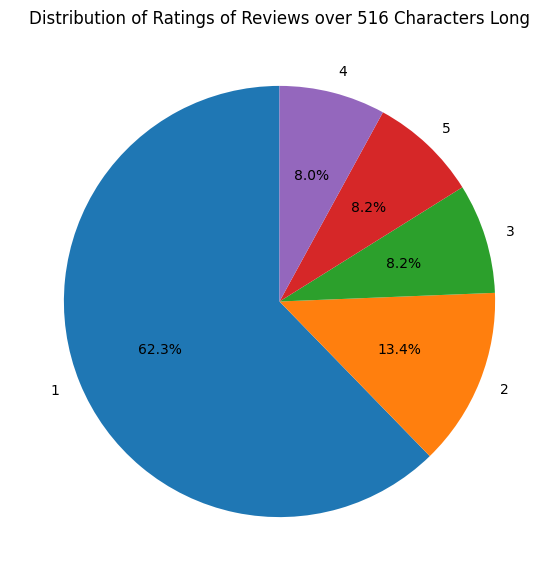

In [27]:
long_reviews = df[df["review_length"] > 516]
#long_reviews.info()
long_reviews['rating'].value_counts().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings of Reviews over 516 Characters Long')
plt.ylabel('')  # Remove ylabel for clarity
plt.show()

In [28]:
pos_long_reviews = long_reviews[long_reviews['rating'] > 3].head()
pos_long_reviews['cleaned_review'].iloc[2]

"EDIT: Recently this McDonald's had been improving a lot, especial when compared to other McDonald's in the area (maybe the one on North part of W. Parmer, but not really fair comparison, I mean That one has a god-damn waterfall....). Keep up the good work! +1 Star OLD: They took out all the power outlets and a table was just left broken covered with caution tape. Always understaffed and you can tell the owners are sucking this place for every penny without putting anything back in. Gives family owned McDonald's a bad name."

In [29]:
from transformers import pipeline

# Create a sentiment analysis pipeline with truncation
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    framework="pt",  # or "tf" if you're using TensorFlow
    truncation=True
)

# Apply it to the cleaned review column
df["bert_sentiment"] = df["cleaned_review"].apply(lambda x: sentiment_pipeline(x)[0]["label"])


c:\Users\hicks\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [30]:
df.head()

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment,refined_sentiment,bert_sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive,negative,NEGATIVE
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive,positive,POSITIVE
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative,negative,NEGATIVE
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,mixed,NEGATIVE
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative,negative,NEGATIVE


In [31]:
#it seems like both VADER and BERT are misclassifying reviews. 
#create column making 1,2 negative, 3 neutral, 4,5 positive.
# Mapping ratings to sentiment categories (you can adjust the ranges as necessary)
def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

df['actual_sentiment'] = df['rating'].apply(map_rating_to_sentiment)


In [32]:
df['bert_sentiment'] = df['bert_sentiment'].str.lower()

In [33]:
# Check how many reviews BERT got correct
df['bert_correct'] = df['bert_sentiment'] == df['actual_sentiment']
bert_accuracy = df['bert_correct'].mean()  # Percentage of correct classifications

# Check how many reviews VADER got correct
df['vader_correct'] = df['vader_sentiment'] == df['actual_sentiment']
vader_accuracy = df['vader_correct'].mean()  # Percentage of correct classifications

print(f"BERT Accuracy: {bert_accuracy * 100:.2f}%")
print(f"VADER Accuracy: {vader_accuracy * 100:.2f}%")


BERT Accuracy: 77.18%
VADER Accuracy: 70.36%


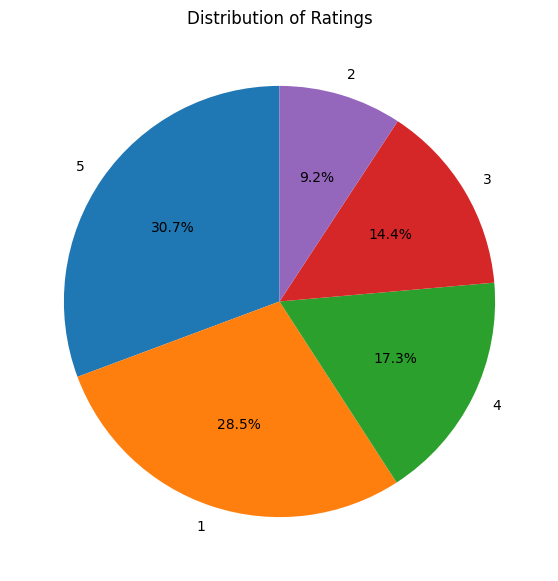

In [34]:
df['rating'].value_counts().plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
plt.ylabel('')  # Remove ylabel for clarity
plt.show()

In [35]:
df.head()

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment,refined_sentiment,bert_sentiment,actual_sentiment,bert_correct,vader_correct
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive,negative,negative,negative,True,False
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive,positive,positive,positive,True,True
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative,negative,negative,negative,True,True
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,mixed,negative,positive,False,False
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative,negative,negative,negative,True,True


In [36]:
#removing irrelevant columns
df_2 = df.drop(df.columns[[5,6,7,8,9,10,11,12,13,14,15]], axis=1)
df_2.reset_index(drop=True, inplace=True)
df_2.head()

,store_address,review_time,rating,cleaned_review,review_length
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312


In [37]:
#make a city and state column for store address instead
df_2[['City', 'State']] = df_2['store_address'].apply(lambda x: pd.Series(x.split(', ')[-3:-1]))
df_2[['State', 'Zip']] = df_2['State'].str.split(' ', expand=True)
df_2.head()

,store_address,review_time,rating,cleaned_review,review_length,City,State,Zip
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,Austin,TX,78750
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,Austin,TX,78750
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,Austin,TX,78750
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,Austin,TX,78750
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,Austin,TX,78750


In [38]:
df_2 = df_2.drop(df.columns[[0]], axis=1)
df_2.head()

,review_time,rating,cleaned_review,review_length,City,State,Zip
0,3 months ago,1,Why does it look like someone spit on my food?...,259,Austin,TX,78750
1,5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,Austin,TX,78750
2,5 days ago,1,Made a mobile order got to the speaker and che...,332,Austin,TX,78750
3,a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,Austin,TX,78750
4,2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,Austin,TX,78750


In [39]:
state_counts = df_2["State"].value_counts()
print(state_counts)

State
FL    8638
TX    6016
CA    5591
NY    5235
NJ    2228
PA    1028
NV    1027
UT     890
IL     749
DC     681
VA     600
Name: count, dtype: int64


In [40]:
city_counts = df_2["City"].value_counts()
print(city_counts)


City
New York             3481
Orlando              3088
Austin               1723
Kissimmee            1718
North Hollywood      1710
Fern Park            1696
Dallas               1647
Miami                1566
Newark               1286
San Diego            1230
Roanoke              1166
Queens               1136
Los Angeles          1034
Brodheadsville       1028
Las Vegas            1027
Voorhees Township     942
Salt Lake City        890
Fort Worth            847
Santa Monica          820
Sunnyvale             797
Oak Park              749
Washington            681
San Antonio           633
Champlain             618
Annandale             600
Miami Beach           570
Name: count, dtype: int64


In [41]:
zip_counts = df_2["Zip"].value_counts()
print(zip_counts)

Zip
32819    2379
10001    2067
34746    1718
91602    1710
32730    1696
75203    1647
33137    1566
07104    1286
76262    1166
10003    1138
11367    1136
18322    1028
89119    1027
08043     942
78724     924
84106     890
76177     847
90405     820
78750     799
94086     797
60302     749
32837     709
92109     680
20036     678
78257     633
12919     618
22003     600
33139     570
90021     550
92111     550
90044     481
10013     270
10002       3
90025       3
20004       3
10038       3
Name: count, dtype: int64


In [42]:
def classify_sentiment(rating):
    if rating in [1, 2]:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:  # 4 or 5
        return "Positive"

df["manual_sentiment"] = df["rating"].apply(classify_sentiment)

In [45]:
df.head()

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment,refined_sentiment,bert_sentiment,actual_sentiment,bert_correct,vader_correct,manual_sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,259,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive,negative,negative,negative,True,False,Negative
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive,positive,positive,positive,True,True,Positive
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,332,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative,negative,negative,negative,True,True,Negative
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,mixed,negative,positive,False,False,Positive
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative,negative,negative,negative,True,True,Negative


In [47]:
print(sentiment_counts)

# Count each category
manual_sentiment_counts = df["manual_sentiment"].value_counts()
print(manual_sentiment_counts)

vader_sentiment
positive    17126
negative     9416
neutral      6141
Name: count, dtype: int64
manual_sentiment
Positive    15667
Negative    12319
Neutral      4697
Name: count, dtype: int64


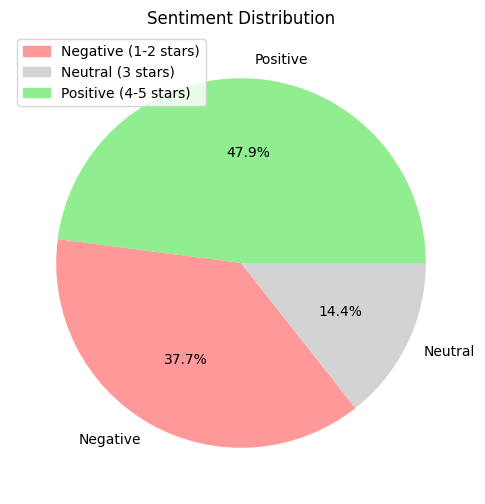

In [49]:
import matplotlib.patches as mpatches
colors = {"Negative": "#FF9999", "Neutral": "#D3D3D3", "Positive": "#90EE90"}  # Soft red, light gray, pastel green

plt.figure(figsize=(6, 6))
plt.pie(manual_sentiment_counts, labels=manual_sentiment_counts.index, autopct="%1.1f%%", 
        colors=[colors[label] for label in manual_sentiment_counts.index])
plt.title("Sentiment Distribution")

# Create legend manually
legend_patches = [
    mpatches.Patch(color="#FF9999", label="Negative (1-2 stars)"),
    mpatches.Patch(color="#D3D3D3", label="Neutral (3 stars)"),
    mpatches.Patch(color="#90EE90", label="Positive (4-5 stars)")
]
plt.legend(handles=legend_patches, loc="best")  # Adjust location if needed

plt.show()


In [50]:
from wordcloud import WordCloud

In [51]:
positive_reviews = " ".join(df[df["manual_sentiment"] == "Positive"]["cleaned_review"])
negative_reviews = " ".join(df[df["manual_sentiment"] == "Negative"]["cleaned_review"])

print("Positive reviews:", positive_reviews[:100])  # Print the first 100 characters
print("Negative reviews:", negative_reviews[:100])  # Print the first 100 characters


Positive reviews: It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a di
Negative reviews: Why does it look like someone spit on my food? I had a normal transaction, everyone was chill and po


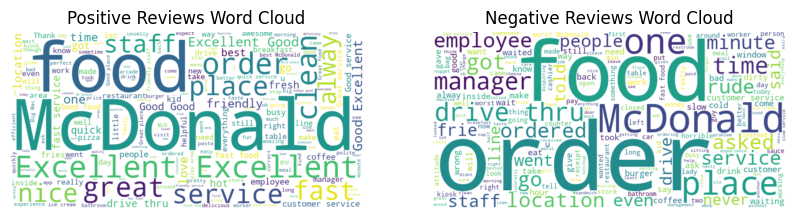

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_reviews)

# Plot the word clouds
plt.figure(figsize=(10, 5))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud")

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud")

plt.show()


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

In [54]:
nltk.download('stopwords')

# Stop words list
stop_words = stopwords.words('english')

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)

# Fit and transform the cleaned reviews
X = vectorizer.fit_transform(df_2["cleaned_review"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hicks\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [55]:
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics
n_topics = 5

# Apply LDA
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Get the words for each topic
def get_top_words(lda_model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words = [words[i] for i in top_words_idx]
        topics.append(top_words)
    return topics

# Get the top words for each topic
topics = get_top_words(lda, vectorizer)
for idx, topic in enumerate(topics):
    print(f"Topic {idx + 1}: {', '.join(topic)}")


Topic 1: poor, mcdonald, love, drive, thru, open, 24, hours, like, closed
Topic 2: order, food, get, drive, time, minutes, one, got, service, go
Topic 3: neutral, slow, mc, best, service, food, awesome, ice, okay, cold
Topic 4: excellent, great, service, nice, quick, ok, place, clean, food, mcdonald
Topic 5: good, fast, service, food, terrible, friendly, clean, fresh, bad, hot


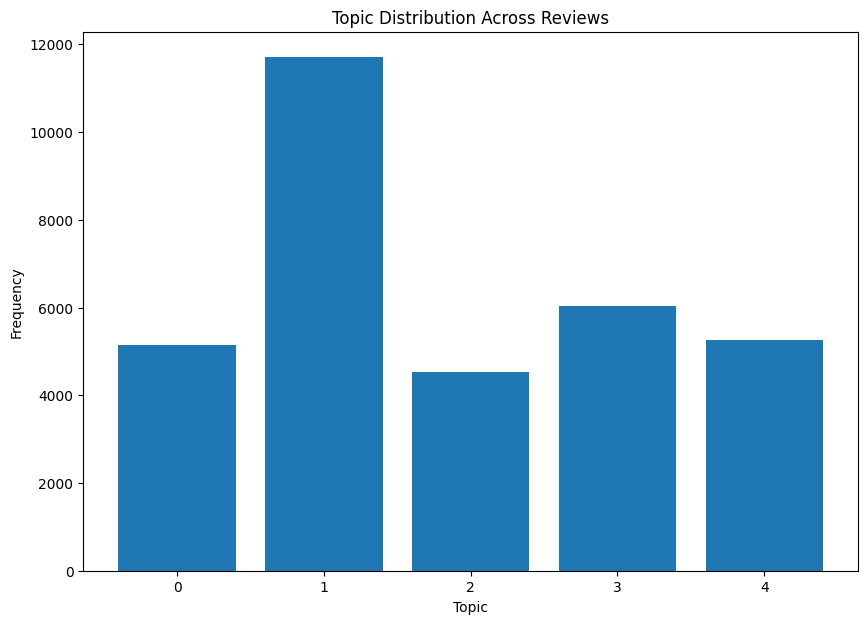

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Get the topic distribution for each review
topic_distribution = lda.transform(X)

# Plot the distribution of topics across the reviews
plt.figure(figsize=(10, 7))
plt.bar(range(n_topics), topic_distribution.sum(axis=0))
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Topic Distribution Across Reviews')
plt.show()


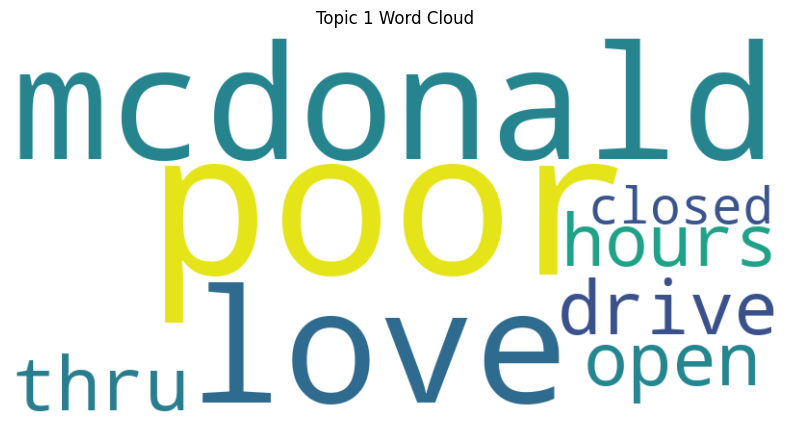

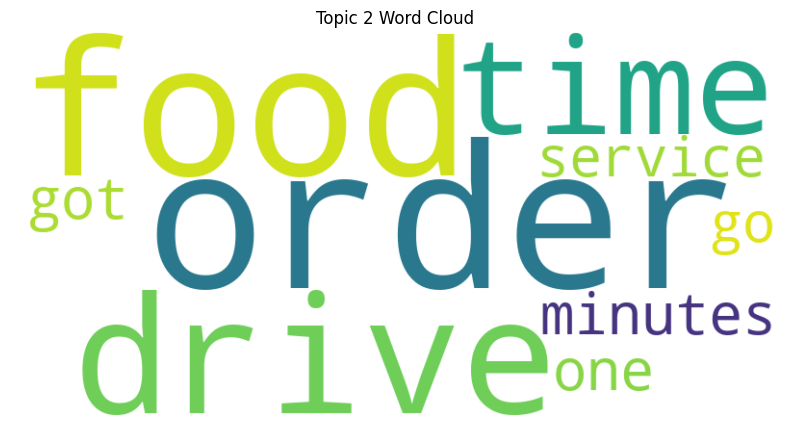

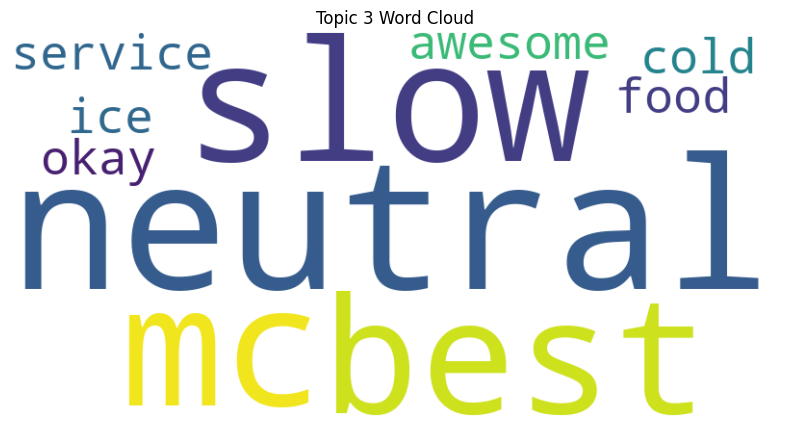

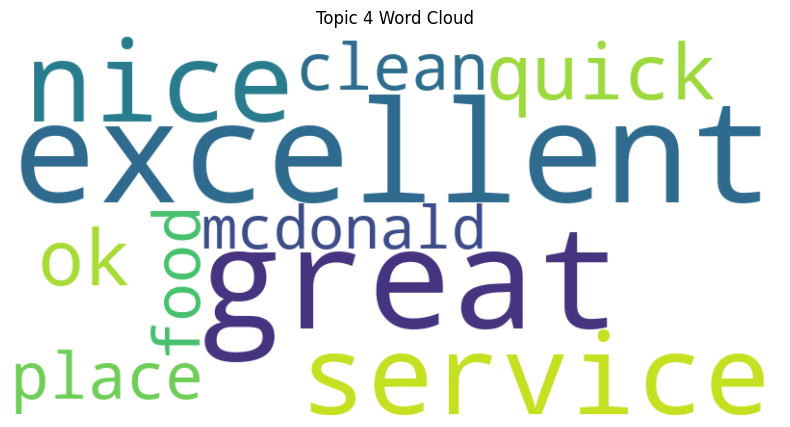

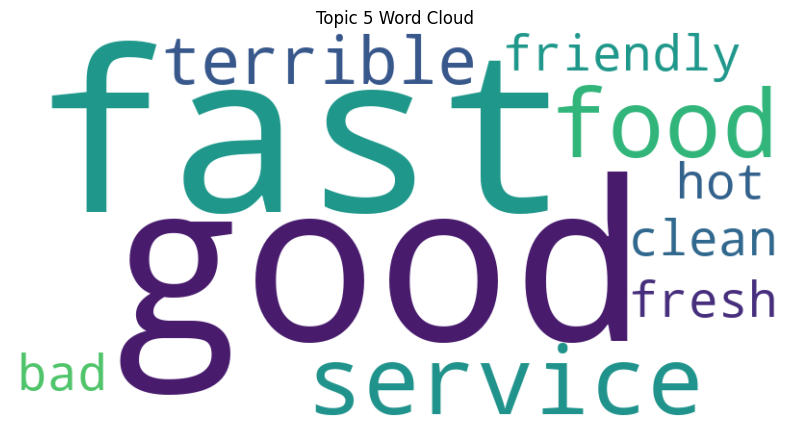

In [57]:
from wordcloud import WordCloud

# Generate word clouds for each topic
for idx, topic in enumerate(topics):
    topic_words = " ".join(topic)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {idx + 1} Word Cloud")
    plt.show()


In [58]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter negative reviews
negative_reviews = df[df["manual_sentiment"] == "Negative"]["cleaned_review"]

# Tokenize the reviews into words (removing any stop words for clarity)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Flatten the list of words
all_negative_words = " ".join(negative_reviews).split()

# Remove stop words
filtered_words = [word for word in all_negative_words if word not in ENGLISH_STOP_WORDS]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Print top 20 common words
print(common_words)


[('I', 10979), ('order', 3160), ('The', 2478), ('food', 2364), ('drive', 1703), ('service', 1554), ('just', 1527), ('like', 1394), ('They', 1394), ('minutes', 1310), ("McDonald's", 1285), ('time', 1248), ('place', 1144), ('got', 1128), ('This', 1020), ('people', 1019), ('asked', 945), ('manager', 914), ('said', 873), ("don't", 823)]


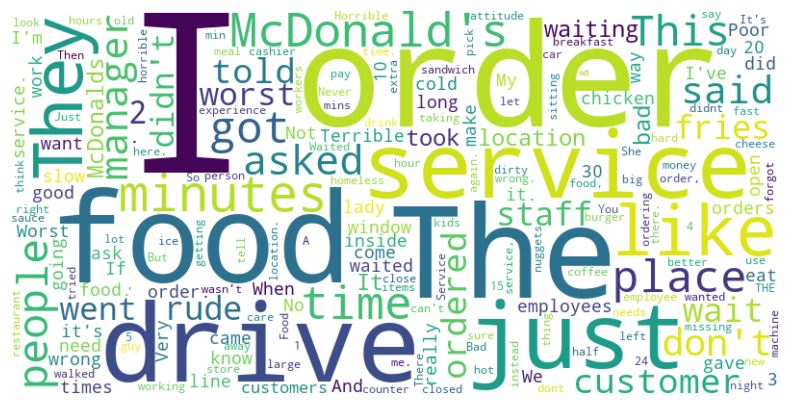

In [59]:
# Create a word cloud from the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [60]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process negative reviews
negative_reviews = df[df["manual_sentiment"] == "Negative"]["cleaned_review"]

# Extract noun phrases from the reviews
noun_phrases = []

for review in negative_reviews:
    doc = nlp(review)
    for np in doc.noun_chunks:  # noun_chunks gives noun phrases
        noun_phrases.append(np.text.lower())  # Convert to lowercase for consistency

# Remove common stopwords (e.g., food, service, etc.)
filtered_nouns = [np for np in noun_phrases if np not in ENGLISH_STOP_WORDS]

# Count the most common noun phrases
noun_counts = Counter(filtered_nouns)

# Get the top 10 most common noun phrases
top_noun_phrases = noun_counts.most_common(10)

# Print the top 10 noun phrases
print(top_noun_phrases)


[('my order', 1147), ('food', 887), ('this location', 650), ('the food', 643), ('the manager', 601), ('this place', 590), ('my food', 477), ('people', 474), ('the drive thru', 440), ('mcdonald', 426)]


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert negative reviews into a list
negative_text = df[df["manual_sentiment"] == "Negative"]["cleaned_review"]

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words="english")
X = vectorizer.fit_transform(negative_text)

# Get the top 15 most common bigrams
bigram_counts = X.toarray().sum(axis=0)
bigrams = vectorizer.get_feature_names_out()
top_bigrams = sorted(zip(bigram_counts, bigrams), reverse=True)[:15]

print(top_bigrams)

[(666, 'customer service'), (327, 'order wrong'), (318, 'fast food'), (291, '20 minutes'), (261, 'worst mcdonald'), (253, 'bad service'), (235, '30 minutes'), (213, 'food cold'), (209, '10 minutes'), (189, '15 minutes'), (187, 'slow service'), (186, 'ice cream'), (184, '24 hours'), (167, 'worst mcdonalds'), (159, 'homeless people')]


C:\Users\hicks\AppData\Local\Temp\ipykernel_12640\4240020159.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Bigram", data=top_bigrams_df, palette="Blues_d")


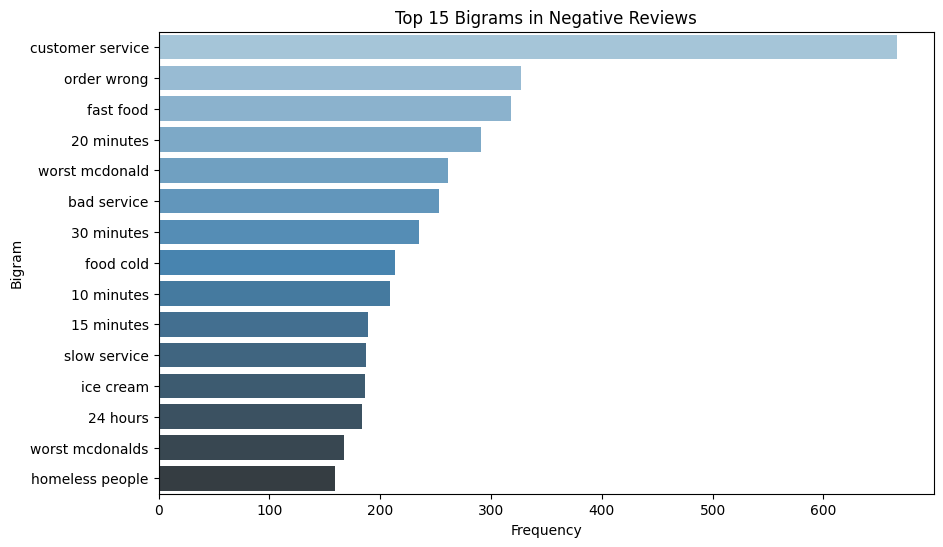

In [62]:
# Convert top_bigrams (list of tuples) into a DataFrame
top_bigrams_df = pd.DataFrame(top_bigrams, columns=["Frequency", "Bigram"])

# Sort the DataFrame by frequency
top_bigrams_df = top_bigrams_df.sort_values(by="Frequency", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Bigram", data=top_bigrams_df, palette="Blues_d")
plt.title('Top 15 Bigrams in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

C:\Users\hicks\AppData\Local\Temp\ipykernel_12640\2460264029.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Trigram", data=top_trigrams_df, palette="Blues_d")


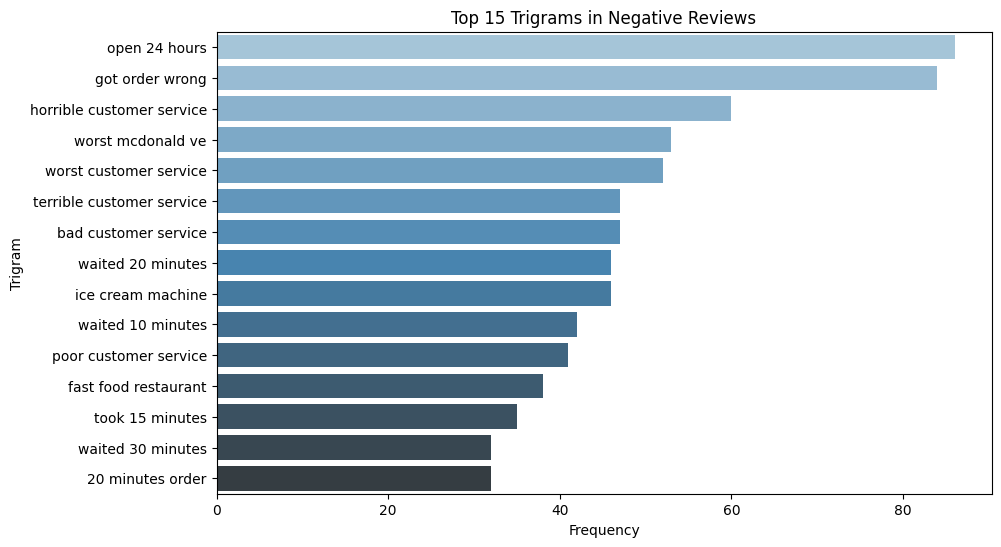

In [63]:
# Use CountVectorizer to extract trigrams (3-grams)
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words="english")
X = vectorizer.fit_transform(negative_text)

# Get the top 15 most common trigrams
trigram_counts = X.toarray().sum(axis=0)
trigrams = vectorizer.get_feature_names_out()
top_trigrams = sorted(zip(trigram_counts, trigrams), reverse=True)[:15]

# Convert top_trigrams (list of tuples) into a DataFrame
top_trigrams_df = pd.DataFrame(top_trigrams, columns=["Frequency", "Trigram"])

# Sort the DataFrame by frequency
top_trigrams_df = top_trigrams_df.sort_values(by="Frequency", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Trigram", data=top_trigrams_df, palette="Blues_d")
plt.title('Top 15 Trigrams in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

[(422, 'fast service'), (396, 'fast food'), (375, 'customer service'), (352, 'good service'), (291, 'good food'), (282, 'great service'), (262, 'food good'), (202, 'friendly staff'), (180, 'service good'), (177, 'quick service'), (163, 'food hot'), (160, 'good place'), (152, 'great place'), (149, 'food fresh'), (145, 'fast friendly')]


C:\Users\hicks\AppData\Local\Temp\ipykernel_12640\2834920188.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Bigram", data=top_bigrams_df, palette="Blues_d")


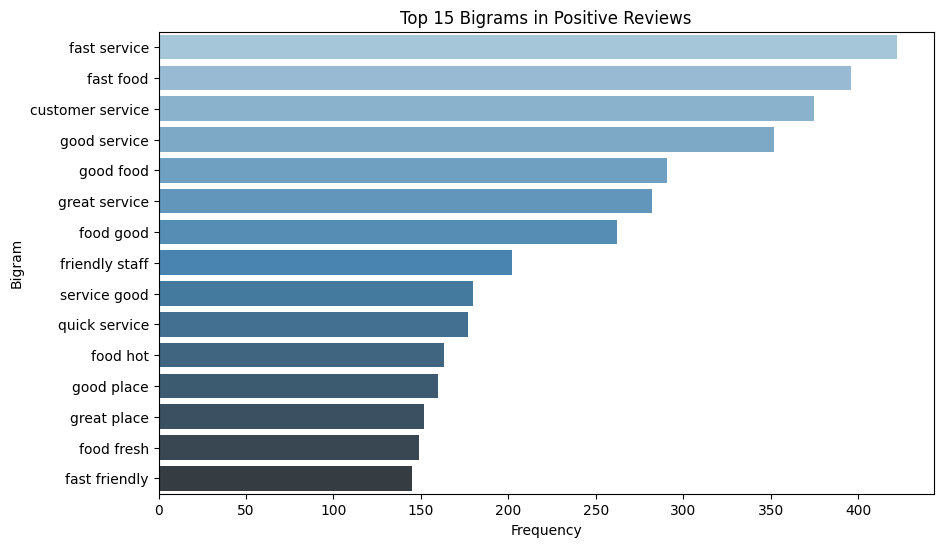

In [64]:

# Convert positive reviews into a list
positive_text = df[df["manual_sentiment"] == "Positive"]["cleaned_review"]

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words="english")
X = vectorizer.fit_transform(positive_text)

# Get the top 15 most common bigrams
bigram_counts = X.toarray().sum(axis=0)
bigrams = vectorizer.get_feature_names_out()
top_bigrams = sorted(zip(bigram_counts, bigrams), reverse=True)[:15]

print(top_bigrams)

# Convert top_bigrams (list of tuples) into a DataFrame
top_bigrams_df = pd.DataFrame(top_bigrams, columns=["Frequency", "Bigram"])

# Sort the DataFrame by frequency
top_bigrams_df = top_bigrams_df.sort_values(by="Frequency", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Bigram", data=top_bigrams_df, palette="Blues_d")
plt.title('Top 15 Bigrams in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

C:\Users\hicks\AppData\Local\Temp\ipykernel_12640\2513309739.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Trigram", data=top_trigrams_df, palette="Blues_d")


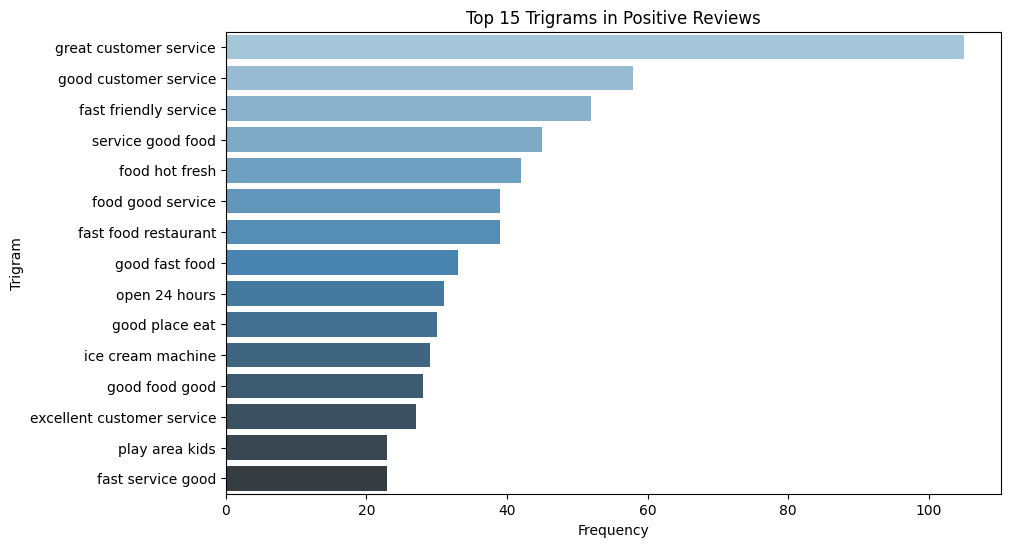

In [65]:
# Use CountVectorizer to extract trigrams (3-grams)
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words="english")
X = vectorizer.fit_transform(positive_text)

# Get the top 15 most common trigrams
trigram_counts = X.toarray().sum(axis=0)
trigrams = vectorizer.get_feature_names_out()
top_trigrams = sorted(zip(trigram_counts, trigrams), reverse=True)[:15]

# Convert top_trigrams (list of tuples) into a DataFrame
top_trigrams_df = pd.DataFrame(top_trigrams, columns=["Frequency", "Trigram"])

# Sort the DataFrame by frequency
top_trigrams_df = top_trigrams_df.sort_values(by="Frequency", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Trigram", data=top_trigrams_df, palette="Blues_d")
plt.title('Top 15 Trigrams in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

[(162, 'fast food'), (85, 'food good'), (81, 'customer service'), (63, 'homeless people'), (58, 'ice cream'), (50, 'slow service'), (50, 'good food'), (48, 'parking lot'), (48, 'order wrong'), (46, 'good service'), (44, 'long wait'), (42, 'order right'), (42, 'fast service'), (40, 'play area'), (38, 'big mac')]


C:\Users\hicks\AppData\Local\Temp\ipykernel_12640\1379314308.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Bigram", data=top_bigrams_df, palette="Blues_d")


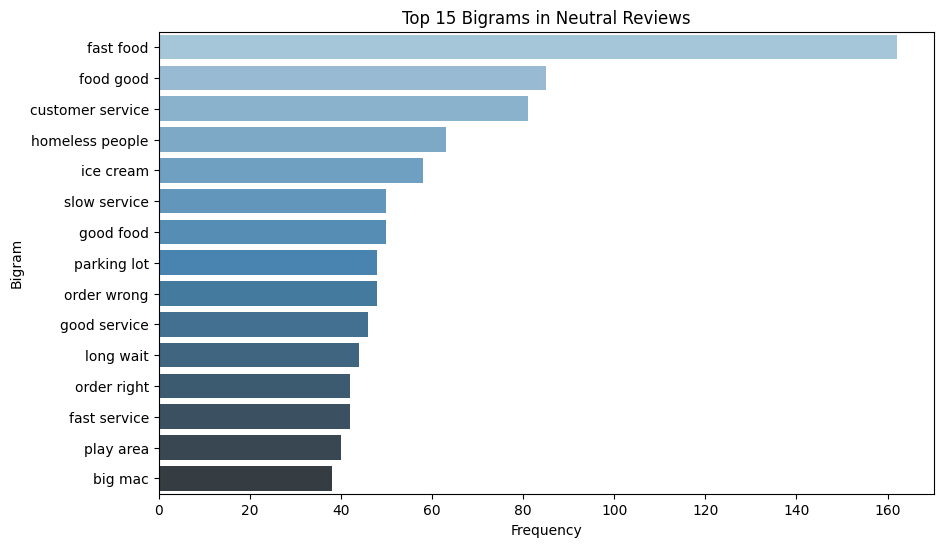

In [66]:

# Convert Neutral reviews into a list
neutral_text = df[df["manual_sentiment"] == "Neutral"]["cleaned_review"]

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words="english")
X = vectorizer.fit_transform(neutral_text)

# Get the top 15 most common bigrams
bigram_counts = X.toarray().sum(axis=0)
bigrams = vectorizer.get_feature_names_out()
top_bigrams = sorted(zip(bigram_counts, bigrams), reverse=True)[:15]

print(top_bigrams)

# Convert top_bigrams (list of tuples) into a DataFrame
top_bigrams_df = pd.DataFrame(top_bigrams, columns=["Frequency", "Bigram"])

# Sort the DataFrame by frequency
top_bigrams_df = top_bigrams_df.sort_values(by="Frequency", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Bigram", data=top_bigrams_df, palette="Blues_d")
plt.title('Top 15 Bigrams in Neutral Reviews')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

C:\Users\hicks\AppData\Local\Temp\ipykernel_12640\3643308476.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Trigram", data=top_trigrams_df, palette="Blues_d")


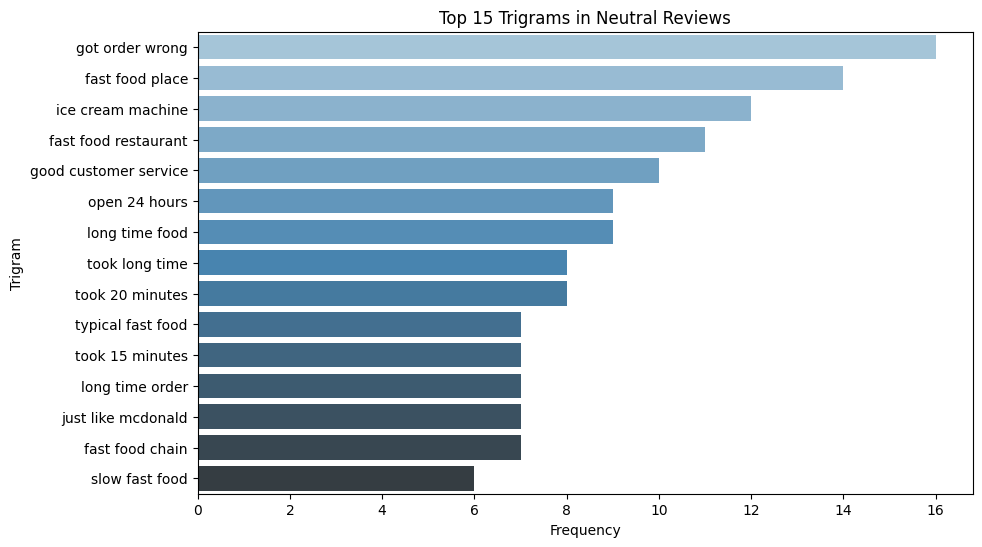

In [67]:
# Use CountVectorizer to extract trigrams (3-grams)
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words="english")
X = vectorizer.fit_transform(neutral_text)

# Get the top 15 most common trigrams
trigram_counts = X.toarray().sum(axis=0)
trigrams = vectorizer.get_feature_names_out()
top_trigrams = sorted(zip(trigram_counts, trigrams), reverse=True)[:15]

# Convert top_trigrams (list of tuples) into a DataFrame
top_trigrams_df = pd.DataFrame(top_trigrams, columns=["Frequency", "Trigram"])

# Sort the DataFrame by frequency
top_trigrams_df = top_trigrams_df.sort_values(by="Frequency", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Trigram", data=top_trigrams_df, palette="Blues_d")
plt.title('Top 15 Trigrams in Neutral Reviews')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

In [68]:
df_2.head()

,review_time,rating,cleaned_review,review_length,City,State,Zip
0,3 months ago,1,Why does it look like someone spit on my food?...,259,Austin,TX,78750
1,5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,Austin,TX,78750
2,5 days ago,1,Made a mobile order got to the speaker and che...,332,Austin,TX,78750
3,a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,Austin,TX,78750
4,2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,Austin,TX,78750


In [69]:
df["review_length"] = df["cleaned_review"].str.len()


In [70]:
df["review_length_words"] = df["cleaned_review"].apply(lambda x: len(str(x).split()))


In [71]:
df.head()

,store_address,review_time,rating,cleaned_review,review_length,sentiment_scores,positive_score,neutral_score,negative_score,compound_score,vader_sentiment,refined_sentiment,bert_sentiment,actual_sentiment,bert_correct,vader_correct,manual_sentiment,review_length_words
0,"13749 US-183 Hwy, Austin, TX 78750, United States",3 months ago,1,Why does it look like someone spit on my food?...,258,"{'neg': 0.025, 'neu': 0.888, 'pos': 0.087, 'co...",0.087,0.888,0.025,0.5215,positive,negative,negative,negative,True,False,Negative,51
1,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.201,0.799,0.000,0.8687,positive,positive,positive,positive,True,True,Positive,42
2,"13749 US-183 Hwy, Austin, TX 78750, United States",5 days ago,1,Made a mobile order got to the speaker and che...,331,"{'neg': 0.045, 'neu': 0.955, 'pos': 0.0, 'comp...",0.000,0.955,0.045,-0.2960,negative,negative,negative,negative,True,True,Negative,70
3,"13749 US-183 Hwy, Austin, TX 78750, United States",a month ago,5,My mc. Crispy chicken sandwich was customer se...,67,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral,mixed,negative,positive,False,False,Positive,12
4,"13749 US-183 Hwy, Austin, TX 78750, United States",2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",0.000,0.874,0.126,-0.8020,negative,negative,negative,negative,True,True,Negative,68


In [72]:
print(df[["review_length", "review_length_words"]].head(10))


   review_length  review_length_words
0            258                   51
1            237                   42
2            331                   70
3             67                   12
4            312                   68
5            190                   44
6            873                  166
7            292                   64
8            195                   33
9            557                  106


In [73]:
df.groupby("manual_sentiment")[["review_length", "review_length_words"]].mean()


,review_length,review_length_words
manual_sentiment,,
Negative,185.039614,34.957464
Neutral,93.537364,17.408346
Positive,72.714559,13.271781


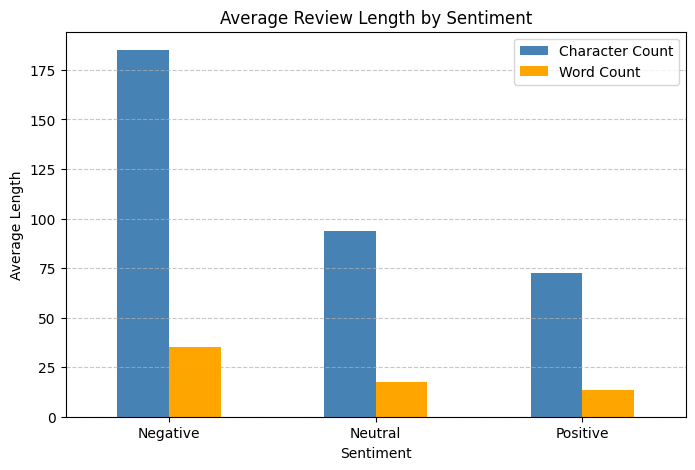

In [74]:
# Calculate averages
avg_lengths = df.groupby("manual_sentiment")[["review_length", "review_length_words"]].mean()

# Plot the bar chart
avg_lengths.plot(kind="bar", figsize=(8, 5), color=["steelblue", "orange"])
plt.title("Average Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Length")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.legend(["Character Count", "Word Count"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [75]:
df_2.head()

,review_time,rating,cleaned_review,review_length,City,State,Zip
0,3 months ago,1,Why does it look like someone spit on my food?...,259,Austin,TX,78750
1,5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,Austin,TX,78750
2,5 days ago,1,Made a mobile order got to the speaker and che...,332,Austin,TX,78750
3,a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,Austin,TX,78750
4,2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,Austin,TX,78750


In [76]:
df_2["manual_sentiment"] = df_2["rating"].apply(classify_sentiment)
df_2.head()

,review_time,rating,cleaned_review,review_length,City,State,Zip,manual_sentiment
0,3 months ago,1,Why does it look like someone spit on my food?...,259,Austin,TX,78750,Negative
1,5 days ago,4,It'd McDonalds. It is what it is as far as the...,237,Austin,TX,78750,Positive
2,5 days ago,1,Made a mobile order got to the speaker and che...,332,Austin,TX,78750,Negative
3,a month ago,5,My mc. Crispy chicken sandwich was customer se...,68,Austin,TX,78750,Positive
4,2 months ago,1,"I repeat my order 3 times in the drive thru, a...",312,Austin,TX,78750,Negative


In [77]:
negative_reviews_by_location = df_2[df_2["manual_sentiment"] == "Negative"].groupby("City")["manual_sentiment"].count()

# Find the location with the most negative reviews
top_negative_location = negative_reviews_by_location.idxmax()
top_negative_count = negative_reviews_by_location.max()

print(f"Location with the highest negative reviews: {top_negative_location} ({top_negative_count} reviews)")


Location with the highest negative reviews: Orlando (1427 reviews)


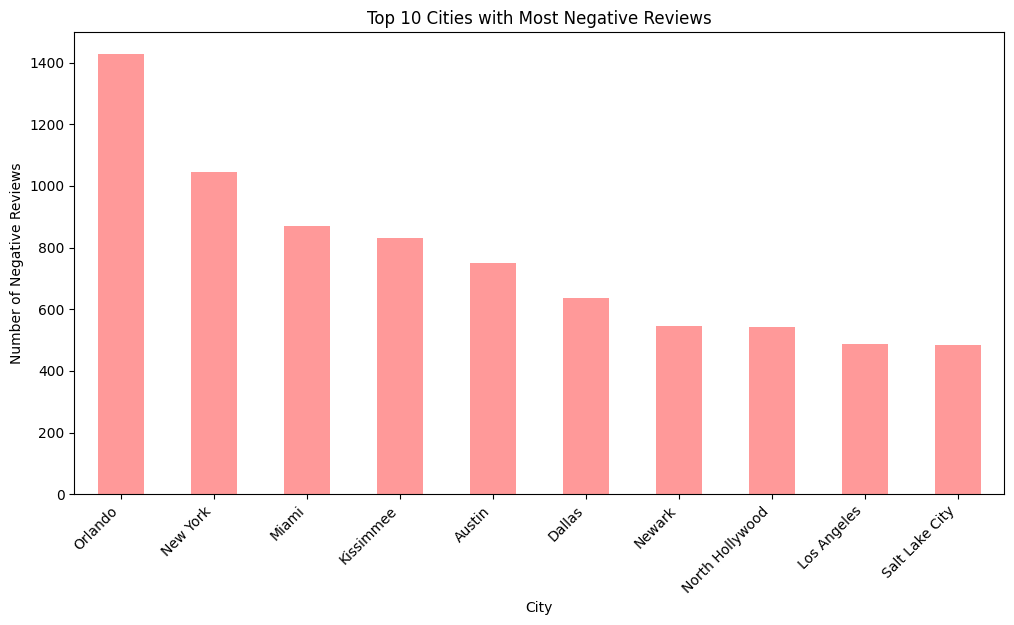

In [78]:
# Filter for negative reviews
negative_locations = df_2[df_2["manual_sentiment"] == "Negative"]["City"].value_counts().head(10)  # Top 10 locations

# Plot
plt.figure(figsize=(12, 6))
negative_locations.plot(kind="bar", color="#FF9999")
plt.xlabel("City")
plt.ylabel("Number of Negative Reviews")
plt.title("Top 10 Cities with Most Negative Reviews")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.show()


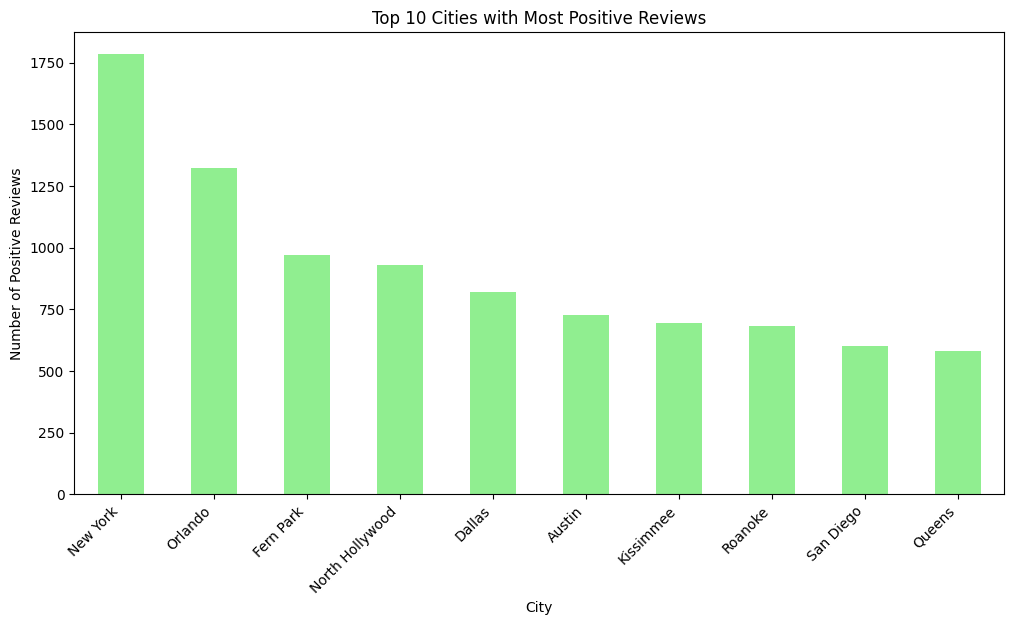

In [79]:
# Filter for negative reviews
positive_locations = df_2[df_2["manual_sentiment"] == "Positive"]["City"].value_counts().head(10)  # Top 10 locations

# Plot
plt.figure(figsize=(12, 6))
positive_locations.plot(kind="bar", color="#90EE90")
plt.xlabel("City")
plt.ylabel("Number of Positive Reviews")
plt.title("Top 10 Cities with Most Positive Reviews")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.show()


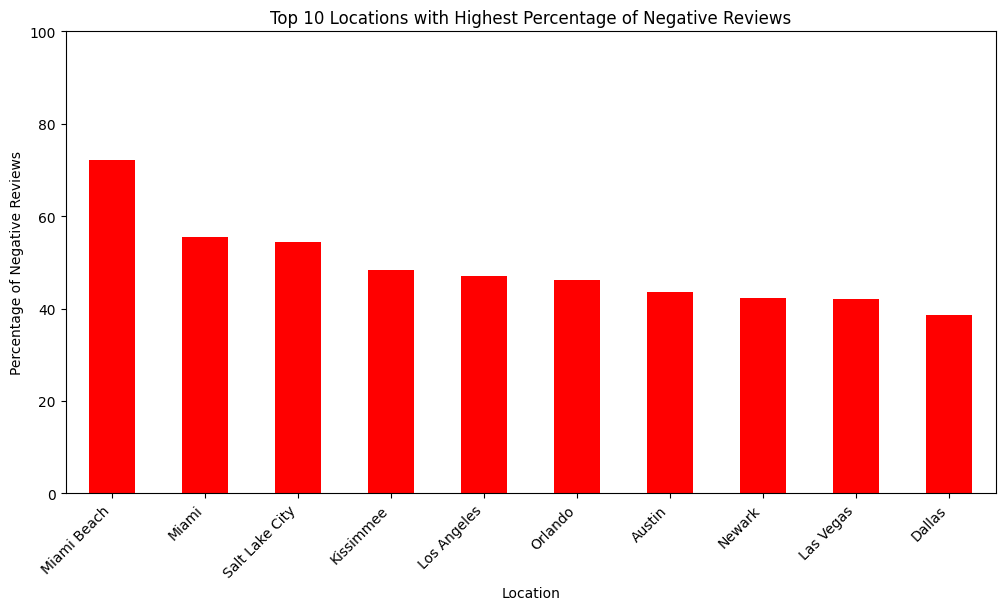

In [80]:
# Count total reviews per location
total_reviews_per_location = df_2["City"].value_counts()

# Count negative reviews per location
negative_reviews_per_location = df_2[df_2["manual_sentiment"] == "Negative"]["City"].value_counts()

# Calculate percentage of negative reviews per location
negative_review_percentage = (negative_reviews_per_location / total_reviews_per_location) * 100

# Keep only locations with at least a certain number of reviews (optional, to avoid outliers)
filtered_negative_percentage = negative_review_percentage[total_reviews_per_location >= 10].sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
filtered_negative_percentage.plot(kind="bar", color="red")
plt.xlabel("Location")
plt.ylabel("Percentage of Negative Reviews")
plt.title("Top 10 Locations with Highest Percentage of Negative Reviews")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)  # Since it's a percentage
plt.show()


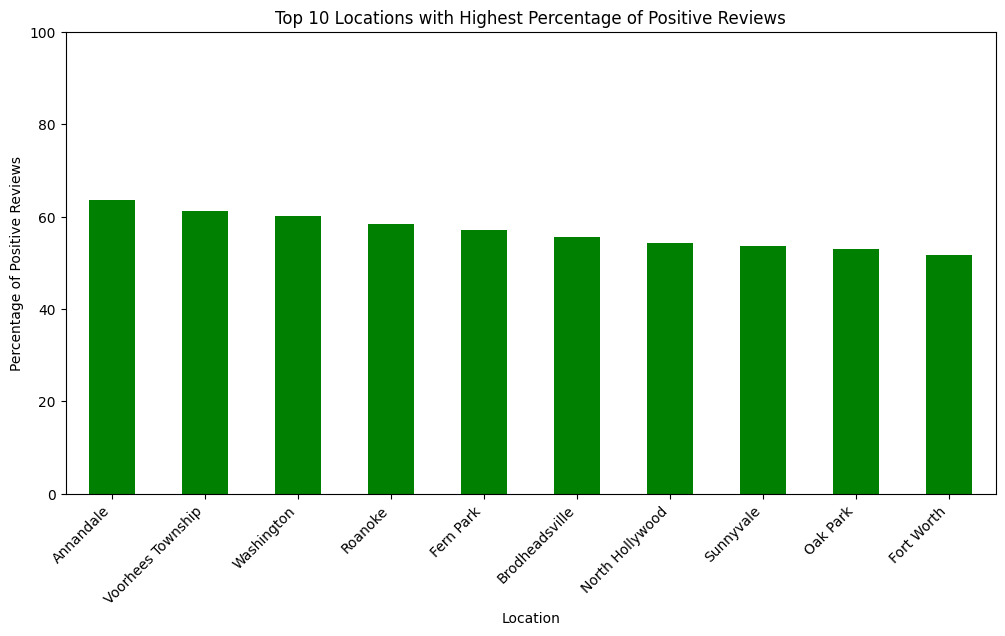

In [81]:
# Count positive reviews per location
positive_reviews_per_location = df_2[df_2["manual_sentiment"] == "Positive"]["City"].value_counts()

# Calculate percentage of positive reviews per location
positive_review_percentage = (positive_reviews_per_location / total_reviews_per_location) * 100

# Keep only locations with at least a certain number of reviews (optional, to avoid outliers)
filtered_positive_percentage = positive_review_percentage[total_reviews_per_location >= 10].sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
filtered_positive_percentage.plot(kind="bar", color="green")
plt.xlabel("Location")
plt.ylabel("Percentage of Positive Reviews")
plt.title("Top 10 Locations with Highest Percentage of Positive Reviews")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)  # Since it's a percentage
plt.show()

In [82]:
# Group by city and list the unique zip codes for each city
city_zip_counts = df_2.groupby("City")["Zip"].nunique()

# Filter to see only cities that have more than one unique zip code
cities_with_multiple_zips = city_zip_counts[city_zip_counts > 1]

# Display the cities and how many unique zip codes they have
print(cities_with_multiple_zips)


City
Austin         2
Los Angeles    3
New York       5
Orlando        2
San Diego      2
Washington     2
Name: Zip, dtype: int64


In [83]:
# Group by city and list unique zip codes
city_zip_list = df_2.groupby("City")["Zip"].unique()

# Convert to DataFrame for better readability
city_zip_df = city_zip_list.reset_index()

print(city_zip_df)


                 City                                  Zip
0           Annandale                              [22003]
1              Austin                       [78750, 78724]
2      Brodheadsville                              [18322]
3           Champlain                              [12919]
4              Dallas                              [75203]
5           Fern Park                              [32730]
6          Fort Worth                              [76177]
7           Kissimmee                              [34746]
8           Las Vegas                              [89119]
9         Los Angeles                [90025, 90021, 90044]
10              Miami                              [33137]
11        Miami Beach                              [33139]
12           New York  [10001, 10003, 10038, 10002, 10013]
13             Newark                              [07104]
14    North Hollywood                              [91602]
15           Oak Park                              [6030

In [85]:
print(df["review_time"].value_counts())

review_time
4 years ago      6623
3 years ago      5416
a year ago       4685
5 years ago      4222
2 years ago      3843
6 years ago      1642
2 months ago      609
8 months ago      486
10 months ago     481
3 months ago      478
a month ago       471
7 months ago      458
5 months ago      448
11 months ago     446
6 months ago      444
9 months ago      435
4 months ago      380
7 years ago       374
2 weeks ago       131
a week ago        124
3 weeks ago       116
8 years ago        84
9 years ago        52
4 weeks ago        46
10 years ago       37
2 days ago         30
4 days ago         25
5 days ago         22
3 days ago         21
6 days ago         17
a day ago          16
11 years ago       10
12 years ago        4
21 hours ago        2
23 hours ago        1
6 hours ago         1
20 hours ago        1
22 hours ago        1
8 hours ago         1
Name: count, dtype: int64


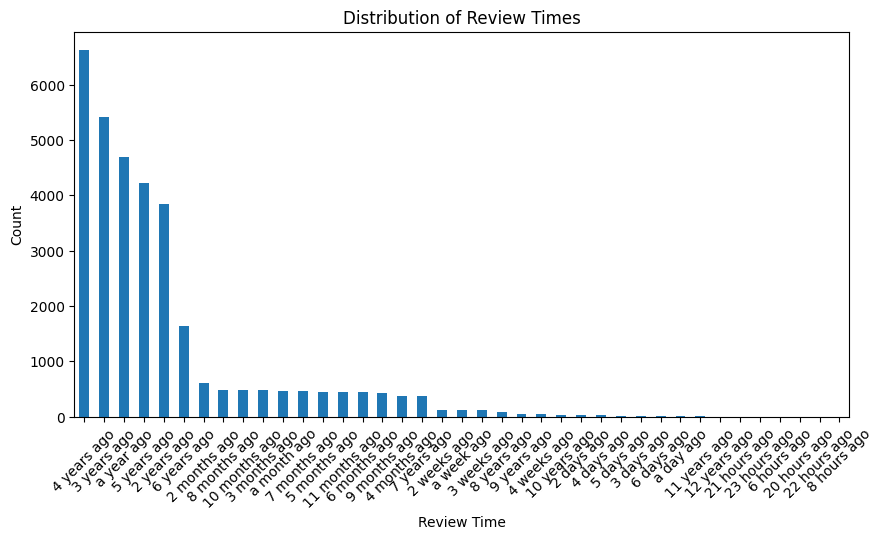

In [86]:
df["review_time"].value_counts().plot(kind="bar", figsize=(10, 5))
plt.xlabel("Review Time")
plt.ylabel("Count")
plt.title("Distribution of Review Times")
plt.xticks(rotation=45)
plt.show()


In [87]:
# Count total reviews per time category
total_reviews = df["review_time"].value_counts()

# Count negative and positive reviews per time category
negative_counts = df[df["manual_sentiment"] == "Negative"]["review_time"].value_counts()
positive_counts = df[df["manual_sentiment"] == "Positive"]["review_time"].value_counts()

# Calculate percentages
negative_percentage = (negative_counts / total_reviews) * 100
positive_percentage = (positive_counts / total_reviews) * 100

# Combine into a DataFrame
sentiment_distribution = pd.DataFrame({
    "Total Reviews": total_reviews,
    "Negative %": negative_percentage,
    "Positive %": positive_percentage
}).fillna(0)

print(sentiment_distribution)


               Total Reviews  Negative %  Positive %
review_time                                         
10 months ago            481   43.243243   41.995842
10 years ago              37   29.729730   32.432432
11 months ago            446   43.497758   45.739910
11 years ago              10   70.000000   20.000000
12 years ago               4    0.000000   75.000000
2 days ago                30   30.000000   60.000000
2 months ago             609   44.006568   44.006568
2 weeks ago              131   50.381679   38.167939
2 years ago             3843   37.340619   49.856883
20 hours ago               1  100.000000    0.000000
21 hours ago               2    0.000000  100.000000
22 hours ago               1  100.000000    0.000000
23 hours ago               1  100.000000    0.000000
3 days ago                21   61.904762   28.571429
3 months ago             478   46.443515   44.979079
3 weeks ago              116   39.655172   50.862069
3 years ago             5416   32.403988   52.

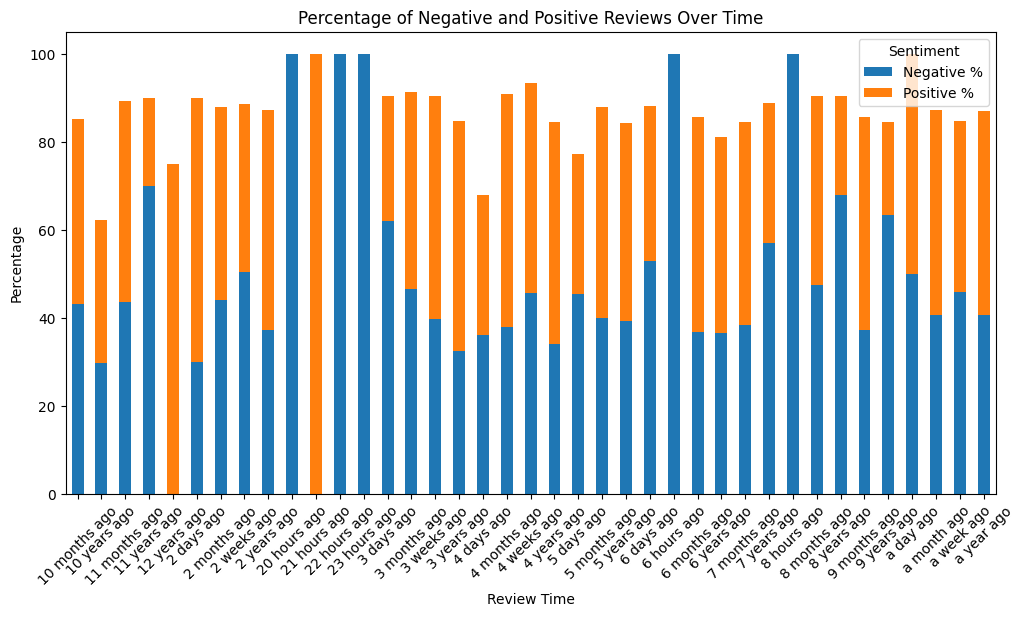

In [88]:
sentiment_distribution[["Negative %", "Positive %"]].plot(kind="bar", figsize=(12, 6), stacked=True)
plt.xlabel("Review Time")
plt.ylabel("Percentage")
plt.title("Percentage of Negative and Positive Reviews Over Time")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


In [91]:
def categorize_review_time(time_str):
    if any(unit in time_str for unit in ["hour", "day", "week", "month"]):
        return "Past 6 Months"
    elif "year" in time_str:
        # Extract the number (handles cases like "a year ago")
        num_years = ''.join(filter(str.isdigit, time_str))  # Extract digits only
        num_years = int(num_years) if num_years else 1  # Default to 1 if "a year ago"
        return f"{num_years} Year Ago" if num_years == 1 else f"{num_years} Years Ago"
    else:
        return "Unknown"

In [92]:
# Apply function to categorize reviews
df["review_period"] = df["review_time"].apply(categorize_review_time)

# Group and count reviews by period
review_distribution = df["review_period"].value_counts().sort_index()

print(review_distribution)

review_period
1 Year Ago       4685
10 Years Ago       37
11 Years Ago       10
12 Years Ago        4
2 Years Ago      3843
3 Years Ago      5416
4 Years Ago      6623
5 Years Ago      4222
6 Years Ago      1642
7 Years Ago       374
8 Years Ago        84
9 Years Ago        52
Past 6 Months    5691
Name: count, dtype: int64


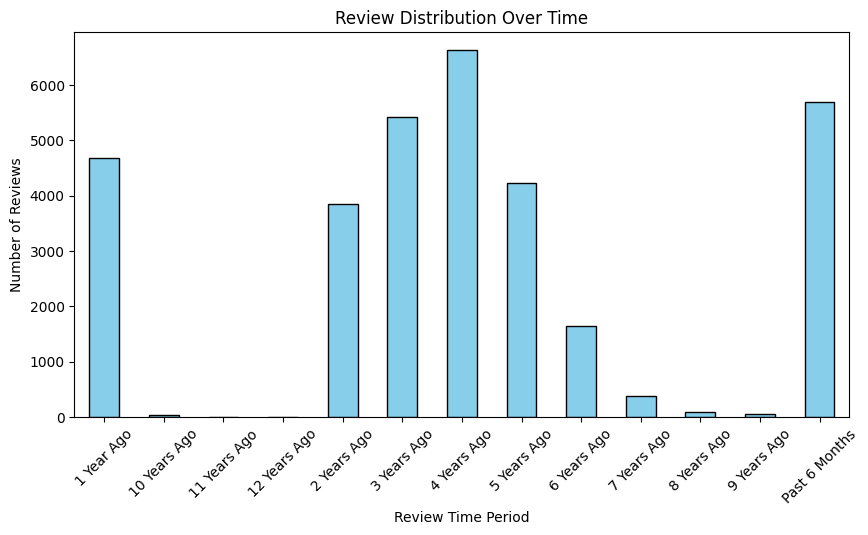

In [93]:
review_distribution.plot(kind="bar", figsize=(10, 5), color="skyblue", edgecolor="black")
plt.xlabel("Review Time Period")
plt.ylabel("Number of Reviews")
plt.title("Review Distribution Over Time")
plt.xticks(rotation=45)
plt.show()

In [94]:
time_order = ["Past 6 Months", "1 Year Ago", "2 Years Ago", "3 Years Ago", "4 Years Ago", "5 Years Ago", "6 Years Ago", "7 Years Ago", "8 Years Ago", "9 Years Ago", "10 Years Ago", "11 Years Ago", "12 Years Ago"]

In [95]:
df["review_period"] = pd.Categorical(df["review_period"], categories=time_order, ordered=True)

In [96]:
review_distribution = df["review_period"].value_counts().sort_index()

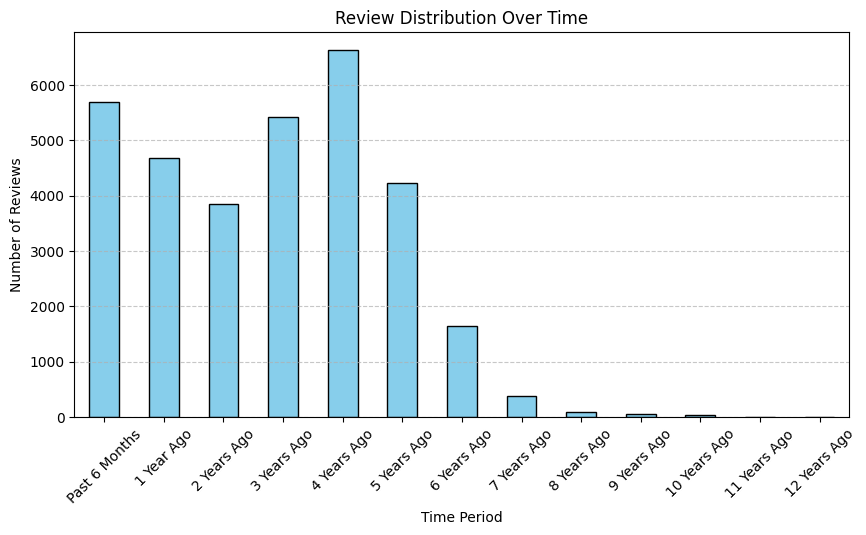

In [97]:
plt.figure(figsize=(10, 5))
review_distribution.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Review Distribution Over Time")
plt.xlabel("Time Period")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [98]:
# Count total reviews per time category
total_reviews = df["review_period"].value_counts()

# Count negative and positive reviews per time category
negative_counts = df[df["manual_sentiment"] == "Negative"]["review_period"].value_counts()
positive_counts = df[df["manual_sentiment"] == "Positive"]["review_period"].value_counts()

# Calculate percentages
negative_percentage = (negative_counts / total_reviews) * 100
positive_percentage = (positive_counts / total_reviews) * 100

# Combine into a DataFrame
sentiment_distribution = pd.DataFrame({
    "Total Reviews": total_reviews,
    "Negative %": negative_percentage,
    "Positive %": positive_percentage
}).fillna(0)

print(sentiment_distribution)

               Total Reviews  Negative %  Positive %
review_period                                       
Past 6 Months           5691   42.013706   45.791601
1 Year Ago              4685   40.533618   46.446105
2 Years Ago             3843   37.340619   49.856883
3 Years Ago             5416   32.403988   52.381832
4 Years Ago             6623   34.108410   50.339725
5 Years Ago             4222   39.294173   45.002369
6 Years Ago             1642   36.540804   44.579781
7 Years Ago              374   56.951872   31.818182
8 Years Ago               84   67.857143   22.619048
9 Years Ago               52   63.461538   21.153846
10 Years Ago              37   29.729730   32.432432
11 Years Ago              10   70.000000   20.000000
12 Years Ago               4    0.000000   75.000000


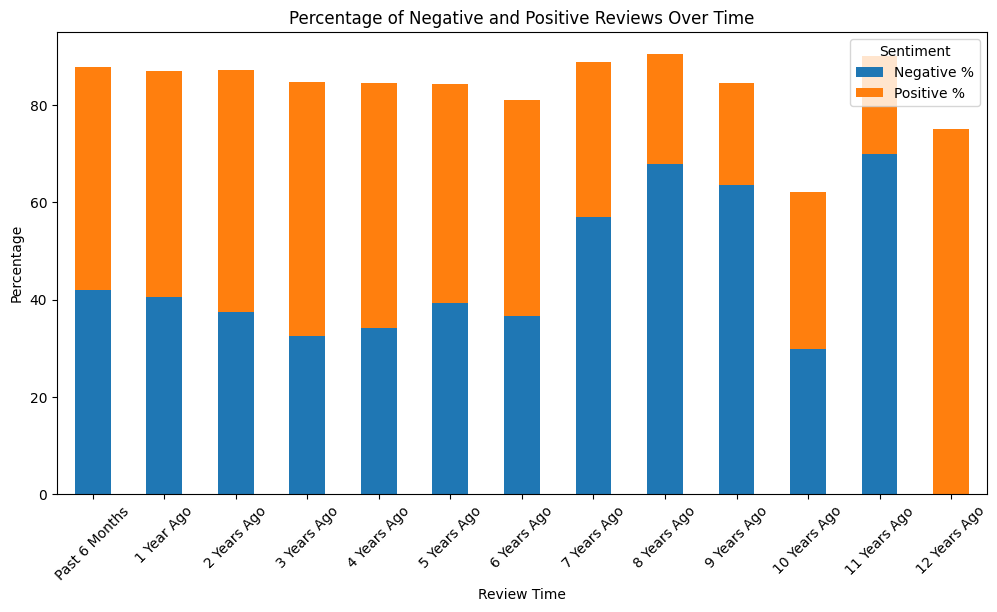

In [99]:
sentiment_distribution[["Negative %", "Positive %"]].plot(kind="bar", figsize=(12, 6), stacked=True)
plt.xlabel("Review Time")
plt.ylabel("Percentage")
plt.title("Percentage of Negative and Positive Reviews Over Time")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


In [103]:
# Count the total reviews per time period
time_totals = df["review_period"].value_counts()

# Count each sentiment per time period
sentiment_counts = df.groupby("review_period")["manual_sentiment"].value_counts().unstack()

# Calculate percentages
sentiment_percentages = (sentiment_counts.div(time_totals, axis=0) * 100).fillna(0)

# Display the result
print(sentiment_percentages)



manual_sentiment   Negative    Neutral   Positive
review_period                                    
Past 6 Months     42.013706  12.194693  45.791601
1 Year Ago        40.533618  13.020277  46.446105
2 Years Ago       37.340619  12.802498  49.856883
3 Years Ago       32.403988  15.214180  52.381832
4 Years Ago       34.108410  15.551865  50.339725
5 Years Ago       39.294173  15.703458  45.002369
6 Years Ago       36.540804  18.879415  44.579781
7 Years Ago       56.951872  11.229947  31.818182
8 Years Ago       67.857143   9.523810  22.619048
9 Years Ago       63.461538  15.384615  21.153846
10 Years Ago      29.729730  37.837838  32.432432
11 Years Ago      70.000000  10.000000  20.000000
12 Years Ago       0.000000  25.000000  75.000000


C:\Users\hicks\AppData\Local\Temp\ipykernel_12640\2797134920.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_counts = df.groupby("review_period")["manual_sentiment"].value_counts().unstack()


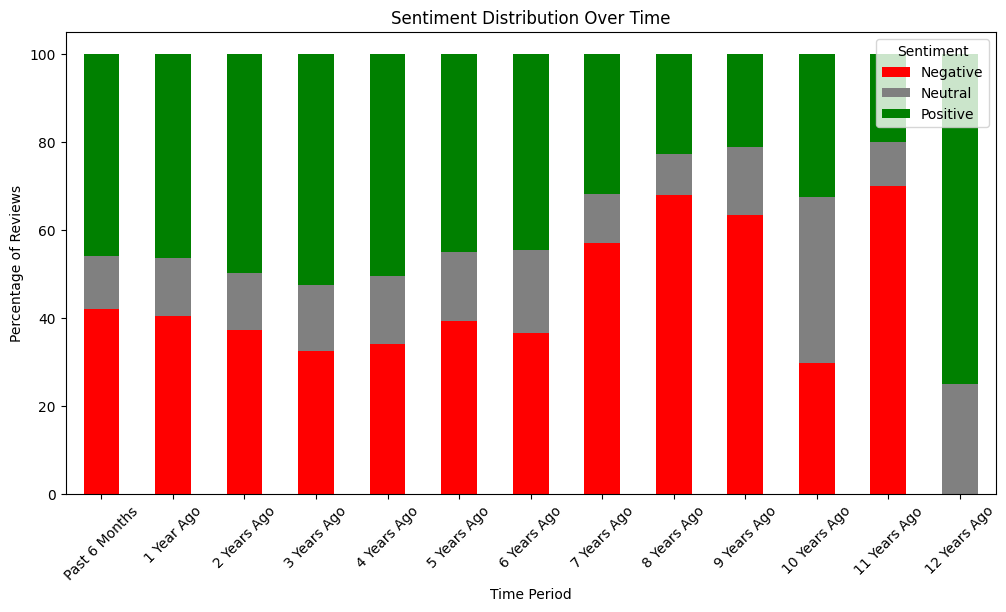

In [104]:
sentiment_percentages.plot(kind="bar", stacked=True, color=["red", "gray", "green"], figsize=(12,6))

plt.xlabel("Time Period")
plt.ylabel("Percentage of Reviews")
plt.title("Sentiment Distribution Over Time")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)

plt.show()

C:\Users\hicks\AppData\Local\Temp\ipykernel_12640\3656955042.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_counts = df.groupby(["review_period", "manual_sentiment"]).size().unstack(fill_value=0)


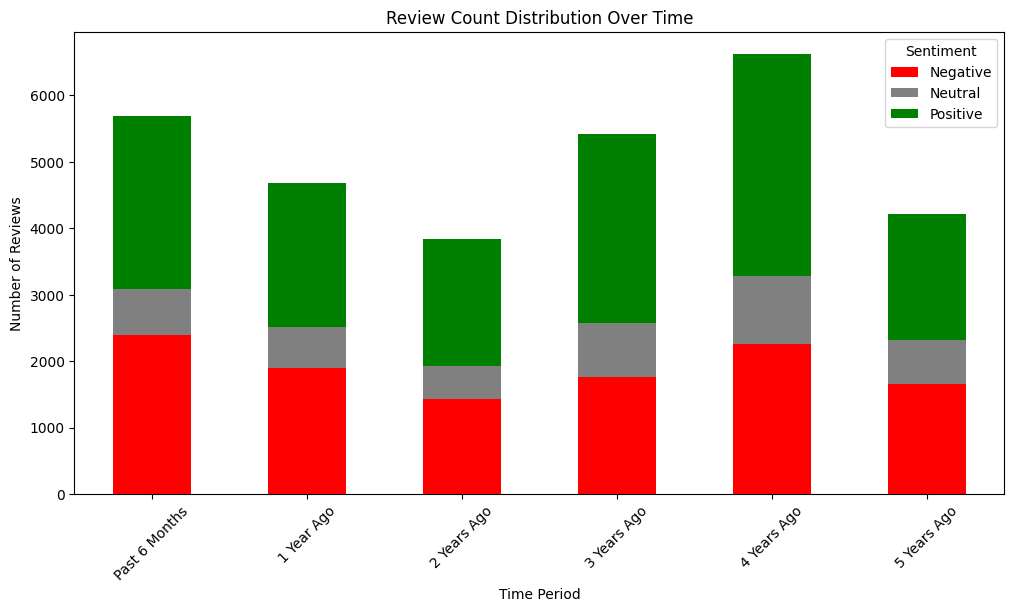

In [110]:
# Count the number of reviews per sentiment category in each time bucket
review_counts = df.groupby(["review_period", "manual_sentiment"]).size().unstack(fill_value=0)

time_buckets_to_include = ["Past 6 Months", "1 Year Ago", "2 Years Ago", "3 Years Ago", "4 Years Ago", "5 Years Ago"]
filtered_review_counts = review_counts.loc[review_counts.index.isin(time_buckets_to_include)]

# Plot a stacked bar chart
filtered_review_counts.plot(kind="bar", stacked=True, color=["red", "gray", "green"], figsize=(12,6))

plt.xlabel("Time Period")
plt.ylabel("Number of Reviews")
plt.title("Review Count Distribution Over Time")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)

plt.show()

